In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def func(x):
    return 0.02 * np.exp(-x) - 0.2 * np.sin(3*x) + 0.5 * np.cos(2*x) - 7
xi = lambda x: np.array([x ** i for i in range(5)])
def model(w, x):
    return np.dot(w, xi(x))
    
def loss(w, x, y):
    return (model(w, x) - y) ** 2

def dL(w, x, y):
    return 2 * (model(w, x) - y) * xi(x).T

In [47]:
coord_x = np.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x)
sz = len(coord_x)
eta = np.array([0.01, 1e-3, 1e-4, 1e-5, 1e-6])
w = np.array([0] * 5, float)
N = 500 # number of iterations
lm = 0.02 # value of lambda for acount s exp mean
# loss(np.zeros(5), coord_x[1], coord_y[1])
# model(np.ones(5), 2)
dL(np.zeros(5), coord_x[1], coord_y[1])

array([    9.22053635,   -45.18062813,   221.38507782, -1084.78688131,
        5315.4557184 ])

In [48]:
Qe = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)])
np.random.seed(0)
# print(Qe)

In [49]:
for _ in range(N):
    k = np.random.randint(0, sz-1)
    xk = coord_x[k]
    y = coord_y[k]
    w -= eta * dL(w, xk, y)
    Qe = lm * loss(w, xk, y) + (1 - lm) * Qe
    

Q = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)])
print(w, Qe, Q, sep='\n----')

[-6.64395250e+00  1.56201803e-02 -9.97312151e-02 -1.34398923e-02
  4.97916283e-03]
----0.1936973469680487
----0.2699682808265348


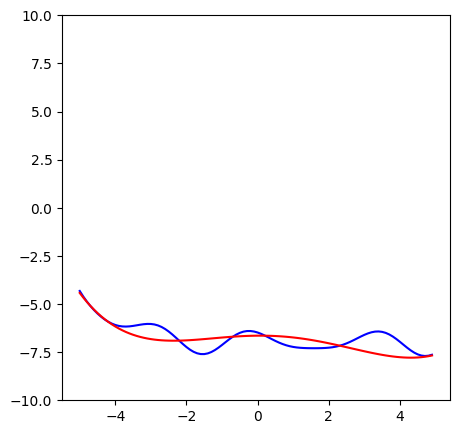

In [50]:
plt.figure(figsize=(5,5))
plt.plot(coord_x, coord_y, c='b')
plt.plot(coord_x, [model(w, x) for x in coord_x], c='r')
plt.ylim(-10, 10)
plt.show()